# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [1]:
import numpy as np
clock_size = 5  # i
T = 86400
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

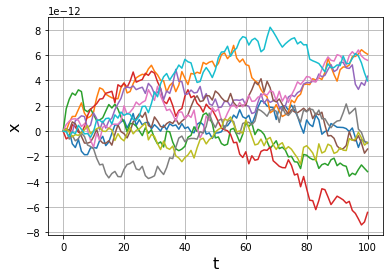

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 5 * 10 ** (-13)
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size * 2
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x, x0
x[:, 0] = 0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t_all, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x[0:clock_size,:-1]
w2_square_sum = (x[clock_size:,:-1] ** 2)

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
print(w2_square_sum)

[[0.00000000e+00 2.16220878e-26 2.40833341e-26 5.58367300e-25
  8.87590770e-25 8.98076586e-25 1.07139765e-24 1.95380903e-24
  2.85924408e-24 3.60174497e-24 3.79019708e-24 3.81200130e-24
  4.28761607e-24 5.17014852e-24 6.09392190e-24 6.66605139e-24
  7.88816673e-24 7.94138595e-24 8.19731971e-24 8.19894423e-24
  8.23876127e-24 8.52778904e-24 8.52791047e-24 9.06751453e-24
  1.00495725e-23 1.18975127e-23 1.30821636e-23 1.52763710e-23
  1.54711094e-23 1.55597581e-23 1.68189038e-23 1.74385780e-23
  1.75773143e-23 1.76645217e-23 1.80186444e-23 1.85707814e-23
  1.89387258e-23 1.98864913e-23 2.01700399e-23 2.07944898e-23
  2.17687894e-23 2.34566793e-23 2.71894634e-23 3.34927178e-23
  4.12885163e-23 4.67484954e-23 5.25132846e-23 6.04270125e-23
  6.81697597e-23 7.41950439e-23 8.42454459e-23 9.30598686e-23
  1.00012465e-22 1.05736530e-22 1.11254091e-22 1.20106885e-22
  1.25197711e-22 1.29140794e-22 1.33073191e-22 1.37266443e-22
  1.41380759e-22 1.49207884e-22 1.59948331e-22 1.75047305e-22
  1.8846

In [7]:
print(w1)

[[ 0.00000000e+00  1.91895678e-13  5.16573180e-14 -9.99156820e-13
  -1.29405619e-12 -6.46410760e-13 -1.59232635e-12 -1.86201609e-12
  -1.85568244e-12 -1.31502936e-12 -1.28977019e-12 -1.34428111e-12
  -7.30559906e-13 -4.12757639e-13 -1.14346410e-12 -8.55101143e-13
  -1.72211263e-13  4.83635564e-13  4.93677998e-13  7.27566000e-13
   8.87421097e-13  2.53923113e-13  7.17846506e-13  1.38990690e-12
   4.45674359e-13  9.04856694e-13  4.89796669e-13  6.73982464e-13
   6.91672088e-13  1.71296226e-13  5.06938517e-13  2.80738216e-13
  -4.34627877e-16  4.78928117e-13  1.07786397e-13  5.79247147e-13
   4.17875040e-13  4.88045465e-13  1.52934333e-13  5.91825528e-13
   2.10792879e-13  3.27284820e-13 -4.98306264e-14 -1.31664106e-13
   5.29392393e-13  7.02787103e-13  5.12950866e-13 -2.34738746e-13
  -1.36688027e-13 -5.75081097e-13 -1.52934224e-13 -1.32458441e-13
  -5.09053877e-14  4.02179921e-13  4.30638671e-13  7.57424364e-13
   1.26668671e-12  1.02903861e-12  1.69187593e-12  1.13342606e-12
   1.00684

In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

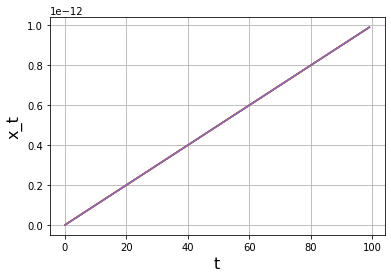

In [9]:
for k in range(x_t.shape[0]):
    plot(t, x_t[k])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [10]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

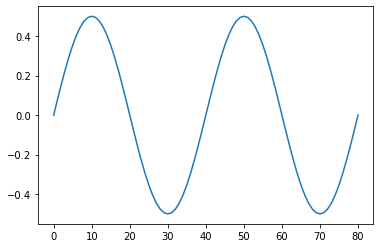

In [11]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

In [13]:
dx = np.diff(x_t)
dT = np.diff(delta_T)

Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

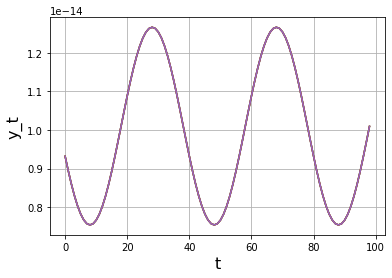

In [14]:
for k in range(Y_t.shape[0]):
    plot(t[:-1], Y_t[k])
xlabel('t', fontsize=16)
ylabel('y_t', fontsize=16)
grid(True)
show()

#### 3. 计算Gamma，并绘制 figure 3

#### 3.1 每两台钟，做差并计算allan variance

In [16]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.00055979e-25 5.15826075e-26 1.92225944e-26 1.00066091e-26
 7.19209392e-27 3.51033414e-27]


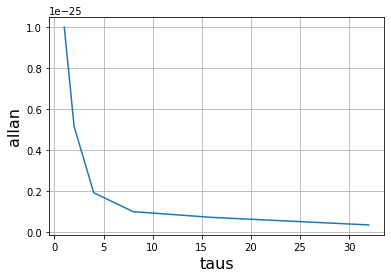

In [21]:
delta_01 = Y_t[0] - Y_t[1]
# Calculate Allan variance
(taus, adevs_01, errors, ns) = allantools.adev(delta_01)
print('taus - %s, adevs - %s' % (taus, adevs_01))

plot(taus, adevs_01)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.18865790e-25 4.93627899e-26 2.21317609e-26 8.13035029e-27
 4.97868343e-27 4.31122728e-27]


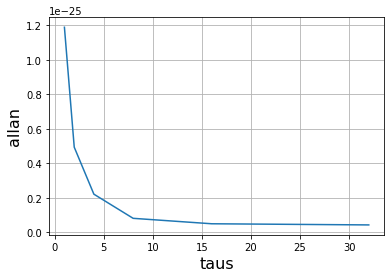

In [22]:
delta_02 = Y_t[0] - Y_t[2]
# Calculate Allan variance
(taus, adevs_02, errors, ns) = allantools.adev(delta_02)
print('taus - %s, adevs - %s' % (taus, adevs_02))

plot(taus, adevs_02)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [ 1.  2.  4.  8. 16. 32.], adevs - [9.95645030e-26 5.04444480e-26 1.46869356e-26 1.32535077e-26
 3.95087076e-27 4.12842594e-27]


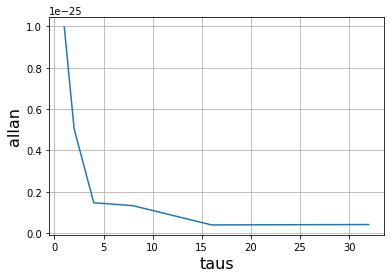

In [23]:
delta_12 = Y_t[1] - Y_t[2]
# Calculate Allan variance
(taus, adevs_12, errors, ns) = allantools.adev(delta_12)
print('taus - %s, adevs - %s' % (taus, adevs_12))

plot(taus, adevs_12)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

#### 3.2 每三台钟，换算一台钟的allan variance，依据公式（3），（4）

#### 3.3 每两台钟，换算相关性C，依据公式（5）

#### 3.4 计算Gamma，并绘图